<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/entregas/Assign4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo de conexão do Google Colab com banco de dados SQLite.  
Retirado de https://www.plus2net.com/python/sqlite-colab.php  
https://datacarpentry.org/python-ecology-lesson/09-working-with-sql/index.html  
https://www.geeksforgeeks.org/absolute-and-relative-frequency-in-pandas/  
https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-simples-ao-pandas-1e15eea37fa1  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sqlite3

# ler os resultados da query do sqlite para uma DataFrame pandas
con = sqlite3.connect("/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Database/database.sqlite")
df = pd.read_sql_query("SELECT * from logs", con)
con.close()

# visualizar as 8 primeiras entradas no dataset
df.head(8)

,fk_game,timestamp,uuid,data
0,1,1605668523,2,"[{""t"":1605668522404,""d"":""\""menu_start\""""}]"
1,1,1605708233,4,"[{""t"":1605708215118,""d"":""\""menu_start\""""}]"
2,1,1605708235,4,"[{""t"":1605708216674,""d"":""\""tutorial_start\""""}]"
3,1,1605708240,4,"[{""t"":1605708216758,""d"":""{\""turn\"":0,\""s\"":{\""..."
4,1,1605708245,4,"[{""t"":1605708222102,""d"":""{\""e\"":[{\""emotion\"":..."
5,1,1605708249,4,"[{""t"":1605708226838,""d"":""{\""e\"":[{\""emotion\"":..."
6,1,1605708254,4,"[{""t"":1605708230524,""d"":""{\""e\"":[{\""emotion\"":..."
7,1,1605708259,4,"[{""t"":1605708235935,""d"":""{\""e\"":[{\""emotion\"":..."


In [ ]:
# verificar o tamanho do DataFrame
print("Variáveis:\t {}\n".format(df.shape[1]))
print("Entradas:\t {}".format(df.shape[0]))

Variáveis:	 4

Entradas:	 8463


In [ ]:
# vizualisar os nomes das colunas
df.columns

Index(['fk_game', 'timestamp', 'uuid', 'data'], dtype='object')

In [ ]:
# descobrir os tipos das variáveis
df.dtypes

fk_game       int64
timestamp     int64
uuid         object
data         object
dtype: object

In [ ]:
# visualizar os dados inexistentes das colunas
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

data         0.0
uuid         0.0
timestamp    0.0
fk_game      0.0
dtype: float64

In [ ]:
# visualizar o resultado estatístico do DataFrame
df.describe()

,fk_game,timestamp
count,8463.000000,8.463000e+03
mean,1.702470,1.606952e+09
std,0.887212,1.776110e+06
min,-1.000000,1.605669e+09
25%,1.000000,1.605900e+09
50%,2.000000,1.606164e+09
75%,2.000000,1.607635e+09
max,3.000000,1.613068e+09


In [ ]:
print(df / len(data)) 

In [ ]:
# visualizar a média do atributo numérico
mean_atributo_numerico = df.timestamp.mean()
print(round(mean_atributo_numerico,2))

1606952408.46


In [ ]:
# valores max e min do atributo numérico
max_atributo_numerico = df.timestamp.max()
min_atributo_numerico = df.timestamp.min()

# visualizar os valores máximos e mínimos
print("Min:\t{}".format(min_atributo_numerico))
print("Max:\t{}".format(max_atributo_numerico))

Min:	1605668523
Max:	1613068223


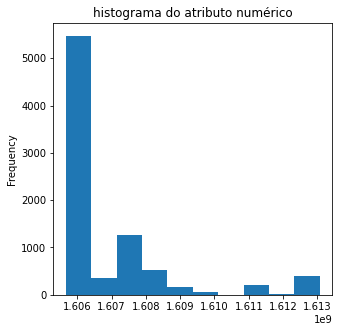

In [ ]:
# plotar um histograma do atributo numérico
df.timestamp.plot(kind="hist",figsize=(5,5), title="histograma do atributo numérico");

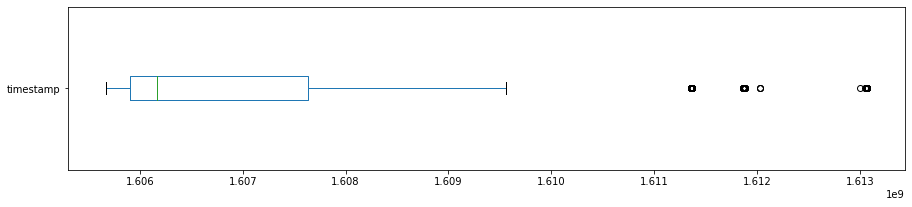

In [ ]:
# plotar bloxplot de atributo numérico
df.timestamp.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

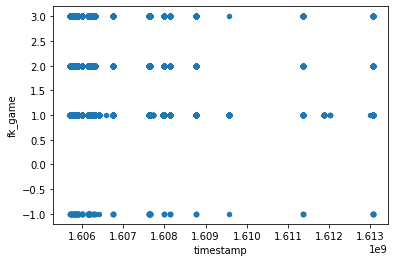

In [ ]:
# gráfico de dispersão
df.plot.scatter(x='timestamp', y='fk_game')